1. 基于iris data，建立KNN实现数据分类(neighbours=3)
2. 对数据进行标准化处理，可视化处理后的效果
3. 进行于原数据等维度PCA，查看各成分的方差比例
4. 保留合适的主成分，可视化降维后的数据
5. 基于降维后的数据建立KNN，与原数据表现对比

In [5]:
# Load the iris data
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris_data = load_iris()

data = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Define x and y
x = data  # all features
y = iris_data.target  # target labels

print(x)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [9]:
# Establish KNN and train it
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x, y)

y_predict = KNN.predict(x)

# Show the accuary
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.96


In [11]:
from sklearn.preprocessing import StandardScaler
x_norm = StandardScaler().fit_transform(x)
print(x_norm)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

Original mean: 5.843333333333334, Normalized mean: -1.4684549872375404e-15
Original std: 0.828066127977863, Normalized std: 1.0


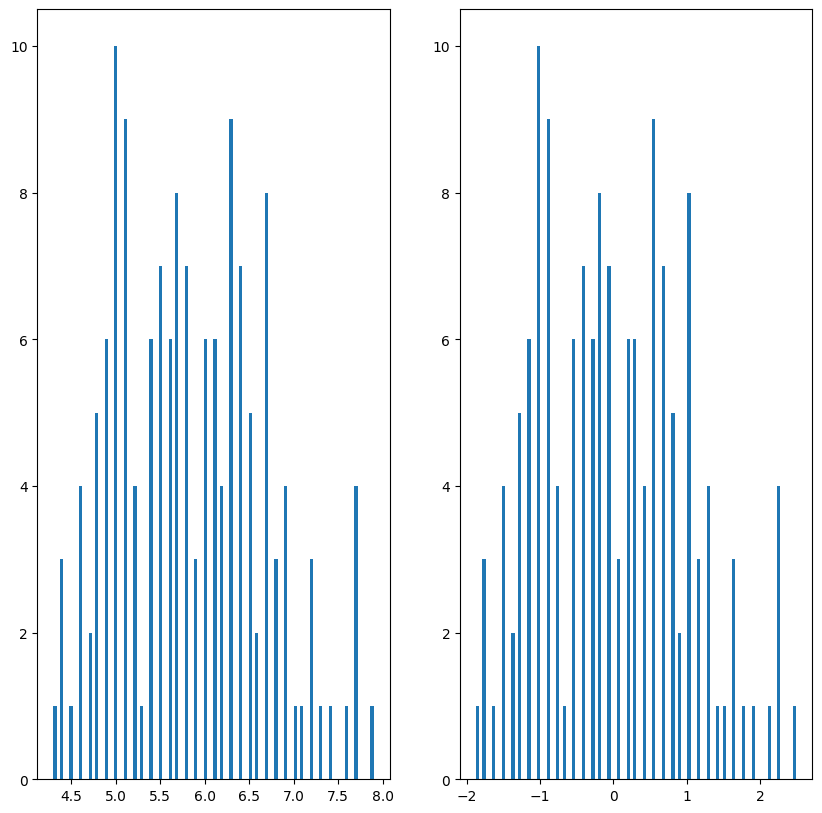

In [16]:
x1_mean = x.loc[:, 'sepal length (cm)'].mean()
x1_norm_mean = x_norm[:, 0].mean()
x1_sigma = x.loc[:, 'sepal length (cm)'].std()
x1_norm_sigma = x_norm[:, 0].std()
print(f"Original mean: {x1_mean}, Normalized mean: {x1_norm_mean}")
print(f"Original std: {x1_sigma}, Normalized std: {x1_norm_sigma}")

from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.hist(x.loc[:, 'sepal length (cm)'], bins=100)
plt.subplot(122)
plt.hist(x_norm[:, 0], bins=100)

plt.show()

In [18]:
print(x.shape)

(150, 4)


In [20]:
# PCA Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_pca = pca.fit_transform(x_norm)
# calculate the variance ratio
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.72962445 0.22850762 0.03668922 0.00517871]


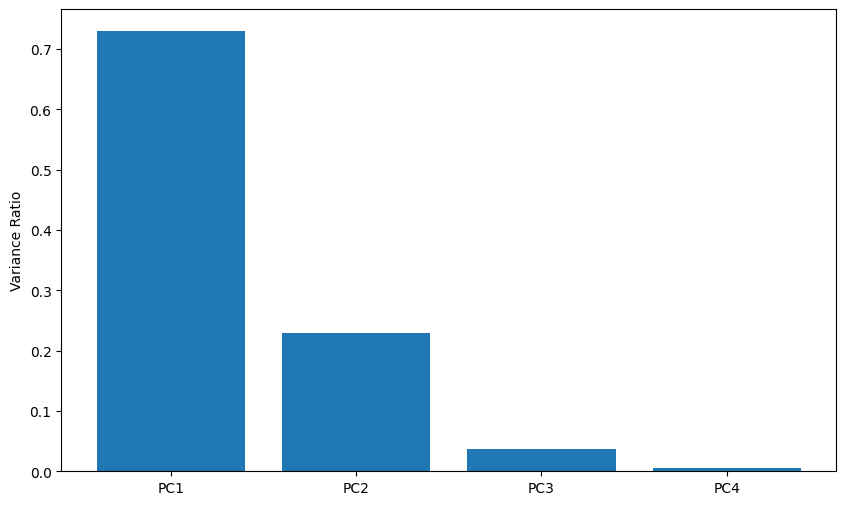

In [24]:
fig2 = plt.figure(figsize=(10, 6))
plt.bar(range(1,5), var_ratio)
plt.xticks(list(range(1,5)), ['PC1', 'PC2', 'PC3', 'PC4'])
plt.ylabel('Variance Ratio')
plt.show()

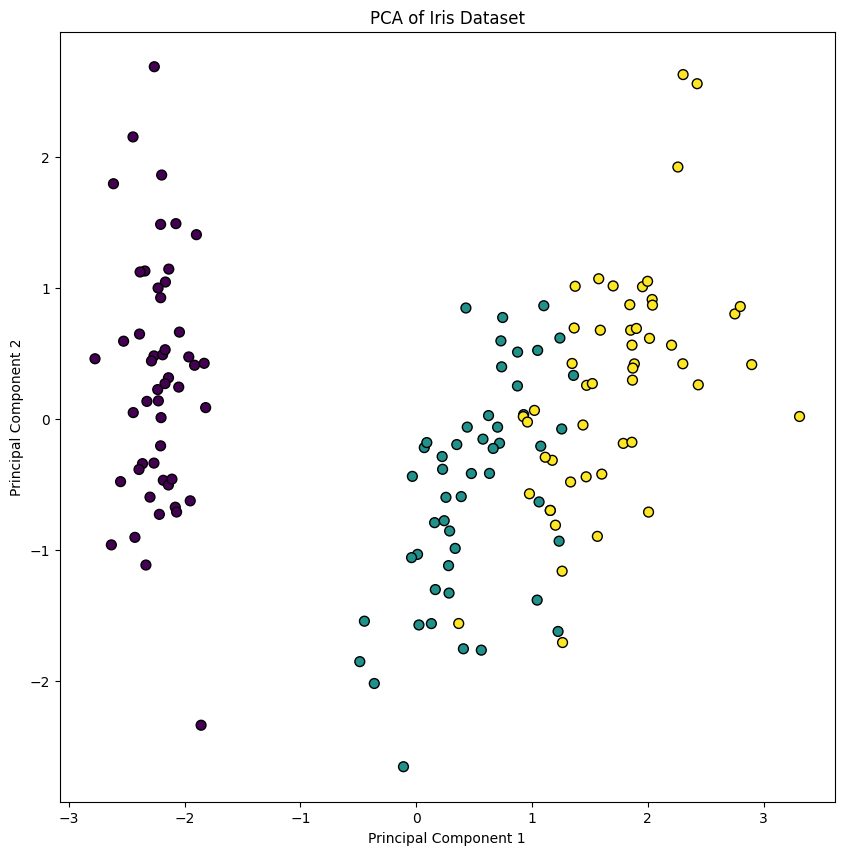

In [25]:
# Visualize the PCA results
fig3 = plt.figure(figsize=(10, 10))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

In [26]:
# Establish new KNN and train it
KNN_pca = KNeighborsClassifier(n_neighbors=3)
KNN_pca.fit(x_pca, y)
y_predict_pca = KNN_pca.predict(x_pca)
# Show the accuary
accuracy_pca = accuracy_score(y, y_predict_pca)
print(accuracy_pca)

0.9533333333333334
